Setup Install

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.3 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


Connect Roboflow

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="KgvKWpmSbtvtASooz7Cq")
project = rf.workspace("sarah-vooy2").project("my-first-project-whott")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-2 in yolov8:: 100%|██████████| 133/133 [00:00<00:00, 2660.94it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Cek Isi Dataset

In [ ]:
!cat My-First-Project-2/data.yaml

names:
- cutter
- knife
- scissors
- syringe
nc: 4
roboflow:
  license: Private
  project: my-first-project-whott
  url: https://app.roboflow.com/sarah-vooy2/my-first-project-whott/2
  version: 2
  workspace: sarah-vooy2
test: ../test/images
train: ../train/images
val: ../valid/images


Train Model

In [ ]:
from ultralytics import YOLO

# BASELINE MODEL
model_baseline = YOLO("yolov8n.pt")

model_baseline.train(
    data="My-First-Project-2/data.yaml",
    epochs=50,
    imgsz=640,
    lr0=0.01,
    batch=16,
    device=0,
    name="baseline"
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=My-First-Project-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=baseline, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7822b92c85c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
# TUNED MODEL
model_tuned = YOLO("yolov8n.pt")

model_tuned.train(
    data="My-First-Project-2/data.yaml",
    epochs=100,
    imgsz=640,
    batch=8,
    device=0,
    optimizer="AdamW",
    lr0=0.001,
    name="tuned"
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=My-First-Project-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tuned, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7821ecedf230>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Evaluasi

(np.float64(-0.5), np.float64(2399.5), np.float64(1199.5), np.float64(-0.5))

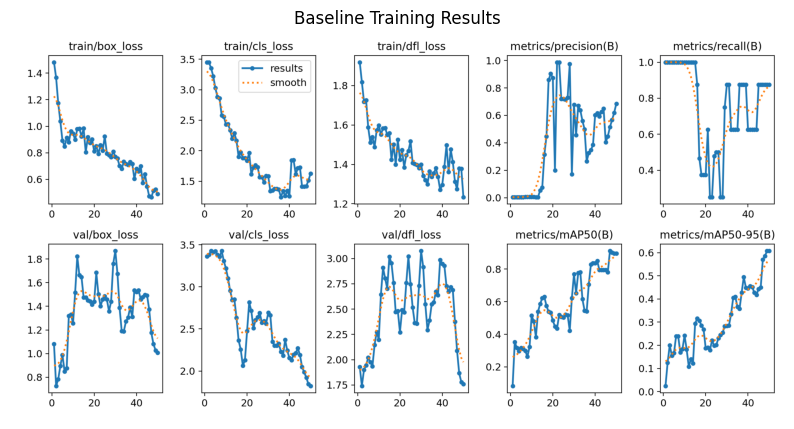

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("runs/detect/baseline/results.png")
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.title("Baseline Training Results")
plt.axis("off")

(np.float64(-0.5), np.float64(2399.5), np.float64(1199.5), np.float64(-0.5))

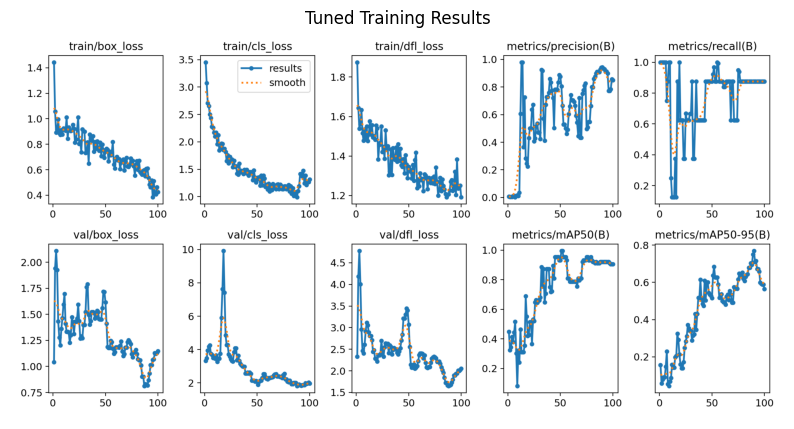

In [ ]:
img = Image.open("runs/detect/tuned/results.png")
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.title("Tuned Training Results")
plt.axis("off")

Predict Hasil Model

In [ ]:
# baseline predict
model_baseline = YOLO("runs/detect/baseline/weights/best.pt")
model_baseline.predict("My-First-Project-2/test/images", save=True, conf=0.25)

# tuned predict
model_tuned = YOLO("runs/detect/tuned/weights/best.pt")
model_tuned.predict("My-First-Project-2/test/images", save=True, conf=0.25)



image 1/2 /content/My-First-Project-2/test/images/download_jpg.rf.f520ef61a670341ba444ca6988d4c3d5.jpg: 640x640 1 knife, 15.0ms
image 2/2 /content/My-First-Project-2/test/images/images-6-_jpg.rf.96783cb7ace7242b500d3aa27cdb4a32.jpg: 640x640 1 knife, 7.3ms
Speed: 2.0ms preprocess, 11.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict

image 1/2 /content/My-First-Project-2/test/images/download_jpg.rf.f520ef61a670341ba444ca6988d4c3d5.jpg: 640x640 1 knife, 7.3ms
image 2/2 /content/My-First-Project-2/test/images/images-6-_jpg.rf.96783cb7ace7242b500d3aa27cdb4a32.jpg: 640x640 1 knife, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cutter', 1: 'knife', 2: 'scissors', 3: 'syringe'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 25

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

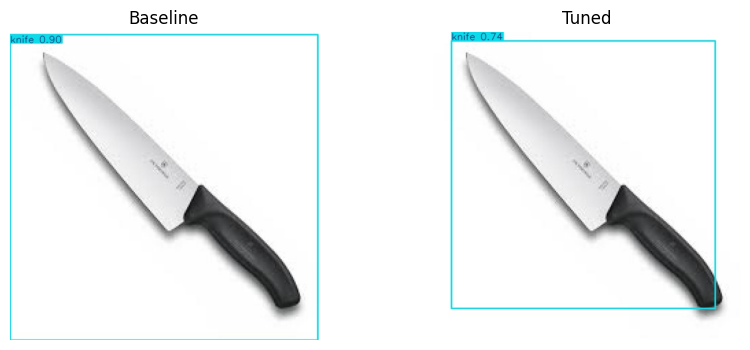

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

img_name = "download_jpg.rf.f520ef61a670341ba444ca6988d4c3d5.jpg"
baseline = Image.open(f"runs/detect/predict/{img_name}")
tuned = Image.open(f"runs/detect/predict2/{img_name}")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(baseline)
plt.title("Baseline")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(tuned)
plt.title("Tuned")
plt.axis("off")

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

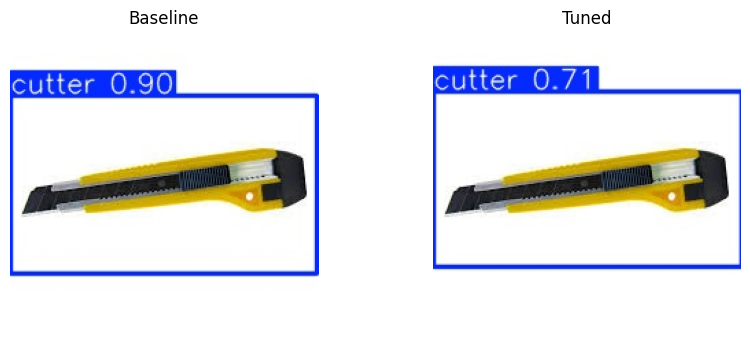

In [ ]:
img_name = "cutter.jpg"
baseline = Image.open(f"runs/detect/predict3/{img_name}")
tuned = Image.open(f"runs/detect/predict4/{img_name}")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(baseline)
plt.title("Baseline")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(tuned)
plt.title("Tuned")
plt.axis("off")

In [ ]:
# baseline predict
model_baseline = YOLO("runs/detect/baseline/weights/best.pt")
model_baseline.predict("/content/syringe.jpg", save=True, conf=0.25)

# tuned predict
model_tuned = YOLO("runs/detect/tuned/weights/best.pt")
model_tuned.predict("/content/syringe.jpg", save=True, conf=0.25)


image 1/1 /content/syringe.jpg: 480x640 1 syringe, 46.0ms
Speed: 2.1ms preprocess, 46.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict5

image 1/1 /content/syringe.jpg: 480x640 1 syringe, 6.7ms
Speed: 1.7ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict6


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cutter', 1: 'knife', 2: 'scissors', 3: 'syringe'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 25

<function matplotlib.pyplot.axis(arg: 'tuple[float, float, float, float] | bool | str | None' = None, /, *, emit: 'bool' = True, **kwargs) -> 'tuple[float, float, float, float]'>

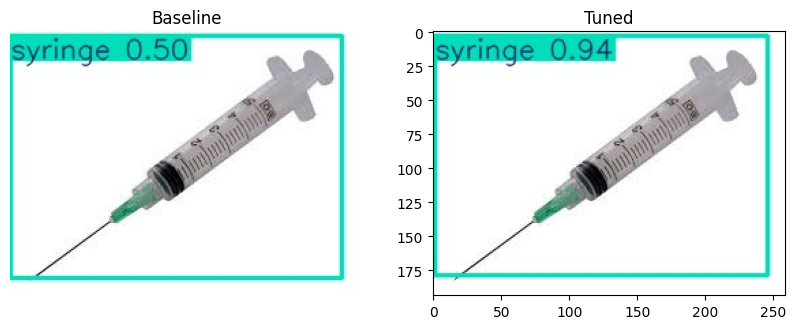

In [ ]:
img_name = "syringe.jpg"
baseline = Image.open(f"runs/detect/predict5/{img_name}")
tuned = Image.open(f"runs/detect/predict6/{img_name}")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(baseline)
plt.title("Baseline")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(tuned)
plt.title("Tuned")
plt.axis

In [ ]:
# baseline predict
model_baseline = YOLO("runs/detect/baseline/weights/best.pt")
model_baseline.predict("/content/video.mp4", save=True, conf=0.25)

# tuned predict
model_tuned = YOLO("runs/detect/tuned/weights/best.pt")
model_tuned.predict("/content/video.mp4", save=True, conf=0.25)


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/595) /content/video.mp4: 384x640 (no detections), 44.3ms
video 1/1 (frame 2/595) /content/video.mp4: 384x640 (no detections), 9.9ms
video 1/1 (frame 3/595) /content/video.mp4: 384x640 (no detections), 6.7ms
video 1/1 (frame 4/595) /content/video.mp4: 384x640 (no detections), 9.0ms
video 1/1 (frame 5/595) /content/video.mp4: 384x640 (no detections), 5.9ms
video 1/1 (frame 6/595) /content/video.mp4: 384x640 (no detections), 6.4ms
video 1

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cutter', 1: 'knife', 2: 'scissors', 3: 'syringe'}
 obb: None
 orig_img: array([[[  0,   0,  18],
         [  6,   2,  26],
         [ 33,  35, 129],
         ...,
         [ 52,  50, 156],
         [  3,   1,  20],
         [  0,   0,  15]],
 
        [[  0,   0,  18],
         [  6,   2,  26],
         [ 33,  35, 129],
         ...,
         [ 52,  50, 156],
         [  3,   1,  20],
         [  0,   0,  15]],
 
        [[  0,   0,  18],
         [  6,   2,  26],
         [ 33,  35, 129],
         ...,
         [ 52,  50, 156],
         [  3,   1,  20],
         [  0,   0,  15]],
 
        ...,
 
        [[  2,   0,  14],
         [  5,   0,  17],
         [ 19,  22, 101],
         ...,
         [ 40,  41, 139],
         [  0,   0,  12],
         [  0,   0,   8]],
 
        [[  2,   0,  14],
         [  5,   0,  17],
         [ 19,  2

In [27]:
from google.colab import files
files.download("/content/runs/detect/predict7/video.avi")
files.download("/content/runs/detect/predict8/video.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
from google.colab import files

files.download("runs/detect/baseline/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>